In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellerss'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ishan@0911',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/mac/Desktop/Projects/Non-core/Ecommerce/data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector

db = mysql.connector.connect(host="localhost", username="root", password="Ishan@0911", database="ecommerce")
cur = db.cursor()

In [11]:
#List of all unique cities

query = """select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [15]:
#count number of orders placed in 2017

query = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017;"""
cur.execute(query)
data=cur.fetchall()
"total orders placed in 2017 are ", data[0][0]

('total orders placed in 2017 are ', 45101)

In [27]:
#sales per category

query = """SELECT UPPER(product_category), ROUND(SUM(payment_value),0) as sales_perCategory
FROM products JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY product_category;"""
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["category", "sales"])
df


,category,sales
0,PERFUMERY,506739.0
1,FURNITURE DECORATION,1430176.0
2,TELEPHONY,486882.0
3,BED TABLE BATH,1712554.0
4,AUTOMOTIVE,852294.0
...,...,...
69,CDS MUSIC DVDS,1199.0
70,LA CUISINE,2914.0
71,FASHION CHILDREN'S CLOTHING,786.0
72,PC GAMER,2174.0


In [30]:
#calculate percetage of orders made by installment

query=""" SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END))*100/count(*) from payments """
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

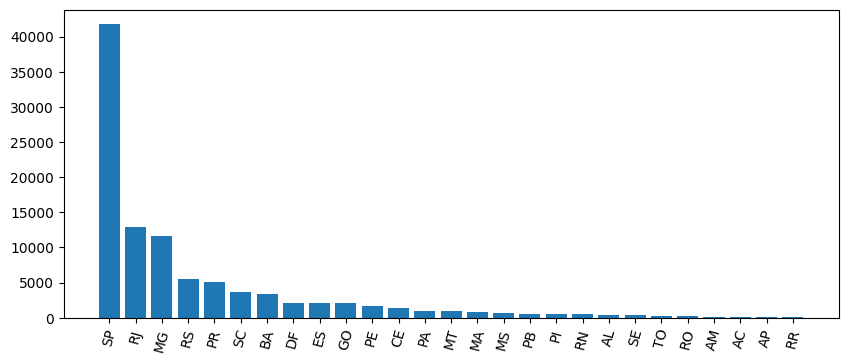

In [40]:
#Count number of customers from each state

query=""" SELECT customer_state, COUNT(customer_id) as customer_from_each_state FROM customers GROUP BY customer_state; """
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["state", "customer count"])
df = df.sort_values(by = "customer count", ascending = False)

plt.figure(figsize = (10,4))
plt.bar(df["state"], df["customer count"])
plt.xticks(rotation=75)
plt.show()

In [42]:
#Calculate the number of orders per month in 2018.

query=""" SELECT MonthName(order_purchase_timestamp) AS order_month, COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY order_month; """
cur.execute(query)
data=cur.fetchall()
data


[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [45]:
#Find the average number of products per order, grouped by customer city.

query=""" WITH count_per_order AS (SELECT orders.customer_id, COUNT(order_items.order_item_id) AS pc, orders.order_id
FROM  orders JOIN order_items ON orders.order_id = order_items.order_id GROUP BY orders.customer_id, orders.order_id) 
SELECT customers.customer_city, AVG(count_per_order.pc) as average_order FROM customers JOIN count_per_order
ON customers.customer_id = count_per_order.customer_id GROUP BY customers.customer_city ORDER BY average_order DESC;  """
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data)
df.head(10)

,0,1
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,datas,6.0000
3,candido godoi,6.0000
4,matias olimpio,5.0000
5,cidelandia,4.0000
6,picarra,4.0000
7,morro de sao paulo,4.0000
8,teixeira soares,4.0000
9,curralinho,4.0000


In [49]:
#Calculate the percentage of total revenue contributed by each product category.

query=""" SELECT upper(product_category), ROUND( SUM(payments.payment_value)*100 / (SELECT SUM(payment_value) FROM payments),2) as sales
FROM products JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON order_items.order_id = payments.order_id GROUP BY product_category ORDER BY sales DESC;  """
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "apercentage distribution"])
df


,Category,apercentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


In [54]:
import numpy as np
#Identify the correlation between product price and the number of times a product has been purchased.

query=""" SELECT products.product_category, COUNT(order_items.product_id), ROUND(AVG(order_items.price),2)
FROM products JOIN order_items ON products.product_id = order_items.product_id 
GROUP BY products.product_category; """
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["Product_category", "No. of Orders", "Average order price"])
arr1 = df["No. of Orders"]
arr2 = df["Average order price"]

np.corrcoef([arr1, arr2])


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

([0, 1, 2, 3, 4],
 [Text(0, 0, '4869f7a5dfa277a7dca6462dcf3b52b2'),
  Text(1, 0, '7c67e1448b00f6e969d365cea6b010ab'),
  Text(2, 0, '53243585a1d6dc2643021fd1853d8905'),
  Text(3, 0, '4a3ca9315b744ce9f8e9374361493884'),
  Text(4, 0, 'fa1c13f2614d7b5c4749cbc52fecda94')])

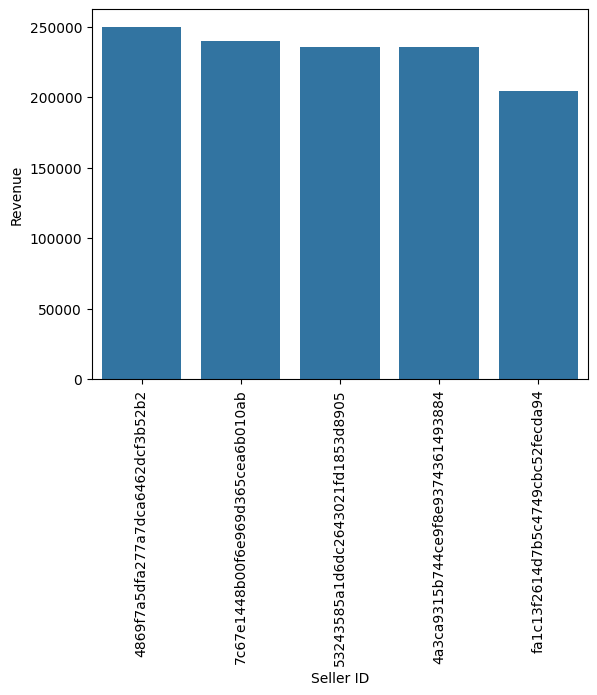

In [61]:
#Calculate the total revenue generated by each seller, and rank them by revenue

query=""" SELECT *, RANK() OVER(ORDER BY revenue DESC) AS rn FROM
(SELECT sellerss.seller_id, ROUND(SUM(order_items.price + order_items.freight_value),2) as revenue
FROM sellerss JOIN order_items ON sellerss.seller_id = order_items.seller_id
GROUP BY sellerss.seller_id ORDER BY revenue DESC) as a; """
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=["Seller ID", "Revenue", "Rank"])
df=df.head(5)
sns.barplot(x = "Seller ID", y="Revenue", data =df) 
plt.xticks(rotation = 90)



In [64]:
#Calculate the moving average of order values for each customer over their order history.

query="""SELECT customer_id, order_purchase_timestamp, AVG(payment) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS move_avg, payment FROM
(SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment FROM orders JOIN payments
ON orders.order_id = payments.order_id) AS A; """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["customer_id", "Timestamp", "Avg Moving Order", "Payment Value"])
df.head(15)

,customer_id,Timestamp,Avg Moving Order,Payment Value
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.800003,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.400002,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.589996,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.230003,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.709961,1255.71


In [67]:
#Calculate the cumulative sales per month for each year.

query=""" SELECT years, months, ROUND(payment,2), ROUND(SUM(payment) OVER(ORDER BY years, months),2) AS cum_payment FROM
(SELECT YEAR(orders.order_purchase_timestamp) AS years, MONTH(orders.order_purchase_timestamp) as months, 
SUM(payments.payment_value) as payment FROM orders JOIN payments
ON orders.order_id = payments.order_id GROUP BY years, months ORDER BY years, months) AS A; """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["Year", "Month", "Payment", "Cumulative Sales"])
df

,Year,Month,Payment,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [69]:
#Calculate year over year growth rate

query=""" WITH B AS(WITH A as (SELECT YEAR(orders.order_purchase_timestamp) AS years, ROUND(SUM(payments.payment_value),2) as payment
FROM orders JOIN payments ON orders.order_id = payments.order_id GROUP BY years ORDER BY years)
SELECT years, payment, lag(payment, 1) OVER(ORDER BY years) as prev_year FROM a)
SELECT years, payment, prev_year, ROUND(((payment-prev_year)*100/prev_year),2) AS growth FROM B; """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["Year", "Sales", "previous year sale", "Growth%"])
df

,Year,Sales,previous year sale,Growth%
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


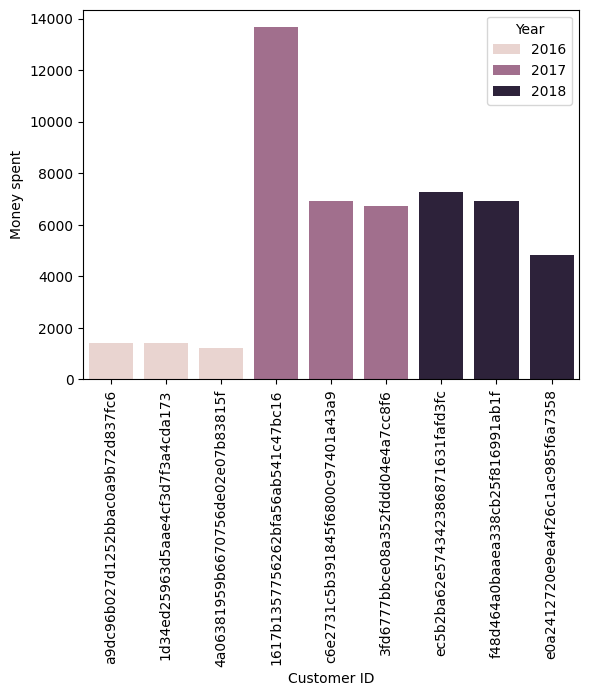

In [75]:
#  Identify the top 3 customers who spent the most money in each year.

query=""" SELECT dates, customer_id, payment, ranking FROM
(SELECT dates, customer_id, payment, RANK() OVER(PARTITION BY dates ORDER BY payment DESC) as ranking FROM 
(SELECT customers.customer_id, YEAR(orders.order_purchase_timestamp) as dates, SUM(payments.payment_value) as payment FROM orders 
JOIN customers ON orders.customer_id = customers.customer_id
JOIN payments ON orders.order_id = payments.order_id GROUP BY customers.customer_id, orders.order_purchase_timestamp ORDER BY dates) AS X)
AS Y WHERE ranking<=3;""" 
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["Year", "Customer ID", "Money spent", "Rank"])
sns.barplot(x="Customer ID", y="Money spent", data=df, hue="Year")
plt.xticks(rotation=90)
plt.show()